In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_22_may_24_re-evaluated.csv")

In [27]:
df = df.rename(columns={'29/08/2024_11:07 - per_class/iou/total/background':"background", 
                   '29/08/2024_11:07 - per_class/iou/total/catenary_pole':"catenary_pole",
                   '29/08/2024_11:07 - per_class/iou/total/person':"person",
                   '29/08/2024_11:07 - per_class/iou/total/track':"track",
                   '29/08/2024_11:07 - per_class/iou/total/train':"train",
                   '29/08/2024_11:07 - per_class/iou/total/buffer_stop':"buffer_stop",
                   '29/08/2024_11:07 - per_class/iou/total/signal':"signal",
                   '29/08/2024_11:07 - per_class/iou/total/road_vehicle':"road_vehicle",
                   "29/08/2024_11:07 - val/total/mIoU":"mIoU"
                   })

I choose to select the epoch 1. The term "epoch" is porbably not the best one, it's just that the evaluation were run multiple times. This introduce a tiny bit of randomness, due to the grid sampling process. But the difference is minimal

In [28]:
plot_data=df[["background","person","train","road_vehicle","track","catenary_pole","signal","buffer_stop","mIoU"]].loc[df["epoch"]==1]

In [29]:
plot_data.values.flatten()

array([0.96720517, 0.72130209, 0.83391766, 0.76203779, 0.82143178,
       0.46350897, 0.59999038, 0.93233261, 0.76271581])

In [30]:
plot_data.columns

Index(['background', 'person', 'train', 'road_vehicle', 'track',
       'catenary_pole', 'signal', 'buffer_stop', 'mIoU'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

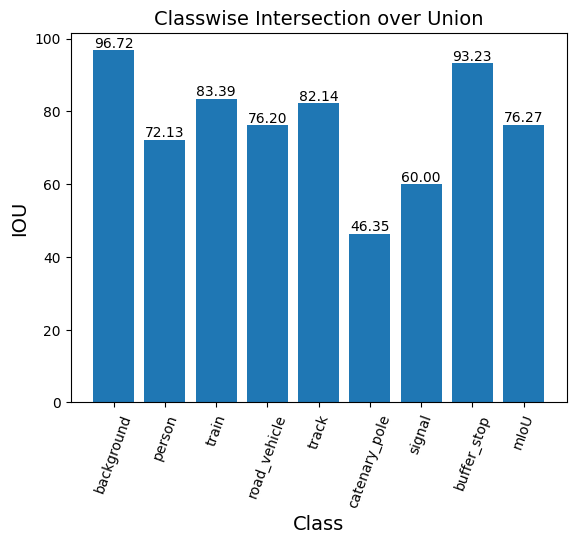

In [32]:
fig, ax = plt.subplots()
bars= ax.bar(plot_data.columns, plot_data.values.flatten()*100)
ax.bar_label(bars, fmt="%.2f")
plt.title("Classwise Intersection over Union", fontdict={"size":14})
plt.xlabel("Class", fontdict={"size":14})
plt.ylabel("IOU", fontdict={"size":14})
plt.xticks(rotation=70)
# plt.savefig("/workspaces/baseline/exp/figures/classwise_iou.jpeg", dpi=400)


### Obtaining scene whicha are concerned by some specification

In [4]:
# df_points_range = pd.DataFrame(list_dict)
# df_points_range.to_csv("/workspaces/baseline/railseg/csv_stats/df_points_class_per_range.csv")

df_points_range = pd.read_csv("/workspaces/baseline/railseg/csv_stats/df_points_class_per_range.csv")

In [8]:
df_points_range[(df_points_range["range"]=="[40-60[")&(df_points_range["split"]=="Test")&(df_points_range["1"]>0)]["scene"].value_counts()

scene
4_station_pedestrian_bridge_4.4    100
5_station_bergedorf_5.2             10
10_station_suelldorf_10.1            1
Name: count, dtype: int64

In [18]:
df_points_range[(df_points_range["range"]=="[40-60[")&(df_points_range["split"]=="Test")&(df_points_range["1"]>0) & (df_points_range["scene"]=='10_station_suelldorf_10.1')]["1"].sum()

52

In [9]:
df_points_range[(df_points_range["range"]=="[40-60[")&(df_points_range["split"]=="Test")&(df_points_range["1"]>0) & (df_points_range["scene"]=='4_station_pedestrian_bridge_4.4')]#["1"].sum()

,Unnamed: 0,scene,file,split,range,0,1,2,3,4,5,6,7
92,92,4_station_pedestrian_bridge_4.4,183,Test,[40-60[,7157,292,0,0,340,0,0,0
101,101,4_station_pedestrian_bridge_4.4,146,Test,[40-60[,7269,239,0,0,312,0,0,0
110,110,4_station_pedestrian_bridge_4.4,131,Test,[40-60[,7216,237,0,0,347,0,0,0
119,119,4_station_pedestrian_bridge_4.4,134,Test,[40-60[,7096,263,0,0,330,0,0,0
128,128,4_station_pedestrian_bridge_4.4,117,Test,[40-60[,7116,238,0,0,327,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,947,4_station_pedestrian_bridge_4.4,157,Test,[40-60[,7167,247,0,0,345,0,0,0
956,956,4_station_pedestrian_bridge_4.4,156,Test,[40-60[,7271,237,0,0,342,0,0,0
965,965,4_station_pedestrian_bridge_4.4,133,Test,[40-60[,7137,251,0,0,368,0,0,0
974,974,4_station_pedestrian_bridge_4.4,125,Test,[40-60[,7158,265,0,0,304,0,0,0
